In [151]:
import pandas as pd
pd.options.display.max_columns = 100

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

### Telemetry

The first data source is the telemetry time-series data which consists of voltage, rotation, pressure, and vibration measurements collected from 100 machines in real time averaged over every hour collected during the year 2015. Below, we display the first 10 records in the dataset. A summary of the whole dataset is also provided.

In [152]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print('Total number of telemetry records: {}'.format(len(telemetry.index)))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


As an example, below is a plot of voltage values for machine ID 1 for the first half of 2015.

Text(0.5, 0, 'Date')

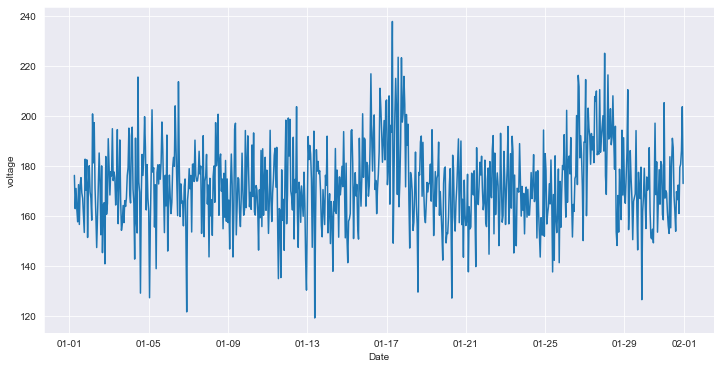

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d'
plt.xlabel('Date')

### Errors

The second major data source is the error logs. These are non-breaking errors thrown while the machine is still operational and do not constitute as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

In [154]:
# format datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

print('Total number of error records: {}'.format(len(errors.index)))
errors.head()

Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


Text(0, 0.5, 'Count')

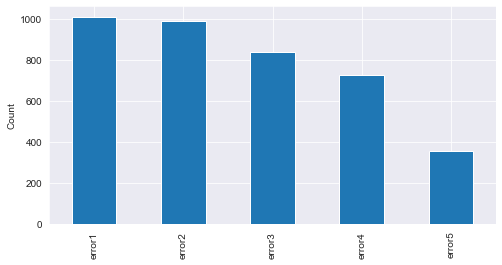

In [155]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')

### Maintenance

These are the scheduled and unscheduled maintenance records which correspond to both regular inspection of components as well as failures. A record is generated if a component is replaced during the scheduled inspection or replaced due to a breakdown. The records that are created due to breakdowns will be called failures which is explained in the later sections. Maintenance data has both 2014 and 2015 records.

In [156]:
# format datetime field which comes in as string
maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

print('Total number of maintenance records: {}'.format(len(maint.index)))
maint.head()

Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Text(0, 0.5, 'Count')

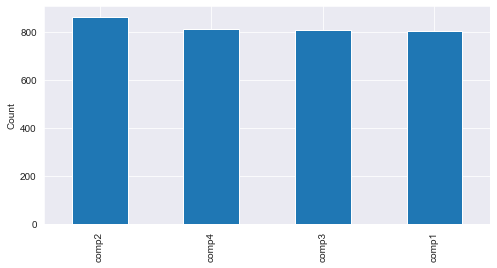

In [157]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')

### Machines

This data set includes some information about the machines: model type and age (years in service).

In [158]:
machines['model'] = machines['model'].astype('category')

print('Total number of machines: {}'.format(len(machines.index)))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


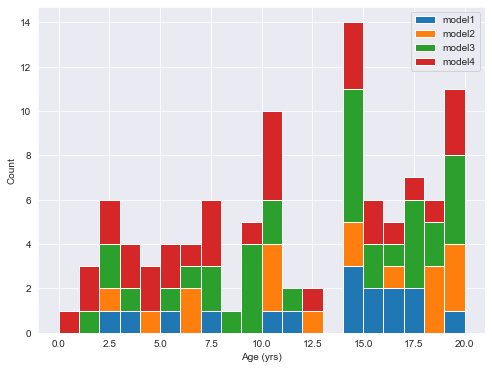

In [159]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

### Failures

These are the records of component replacements due to failures. Each record has a date and time, machine ID, and failed component type.

In [160]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print('Total number of failures: {}'.format(len(failures.index)))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


Below is the histogram of the failures due to each component. We see that the most failures happen due to component 2.

Text(0, 0.5, 'Count')

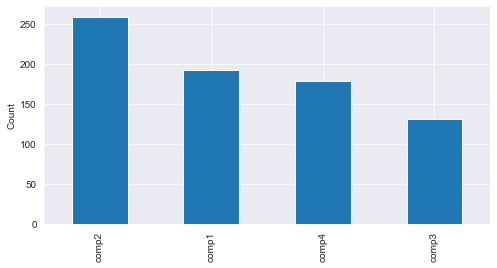

In [161]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
failures['failure'].value_counts().plot(kind='bar')
plt.ylabel('Count')

## Feature Engineering

The first step in predictive maintenance applications is feature engineering which requires bringing the different data sources together to create features that best describe a machines's health condition at a given point in time. In the next sections, several feature engineering methods are used to create features based on the properties of each data source.

### Lag Features from Telemetry

Telemetry data almost always comes with time-stamps which makes it suitable for calculating lagging features. A common method is to pick a window size for the lag features to be created and compute rolling aggregate measures such as mean, standard deviation, minimum, maximum, etc. to represent the short term history of the telemetry over the lag window. In the following, rolling mean and standard deviation of the telemetry data over the last 3 hour lag window is calculated for every 3 hours.

In [162]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [163]:
telemetry_mean_3h

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542
...,...,...,...,...,...,...
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232
292098,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630


For capturing a longer term effect, 24 hour lag features are also calculated as below.

In [164]:
# Calculate mean values for telemetry features
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).mean().resample('3H',
                                                                              closed='left',
                                                                              label='right').first().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).std().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2015-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2015-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2015-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2015-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2015-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


Next, the columns of the feature datasets created earlier are merged to create the final feature set from telemetry.

In [165]:
# merge columns of feature sets created earlier
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()

telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


In [166]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


### Lag Features from Errors

Like telemetry data, errors come with timestamps. An important difference is that the error IDs are categorical values and should not be averaged over time intervals like the telemetry measurements. Instead, we count the number of errors of each type in a lagging window. We begin by reformatting the error data to have one entry per machine per time at which at least one error occurred:

In [167]:
# create a column for each error type
error_count = pd.get_dummies(errors)
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


Now we add blank entries for all other hourly timepoints (since no errors occurred at those times):

In [168]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, we can compute the total number of errors of each type over the last 24 hours, for timepoints taken every three hours:

In [169]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).sum().resample('3H',
                                                                             closed='left',
                                                                             label='right').first().unstack())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [170]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


### Days Since Last Replacement from Maintenance

A crucial data set in this example is the maintenance records which contain the information of component replacement records. Possible features from this data set can be, for example, the number of replacements of each component in the last 3 months to incorporate the frequency of replacements. However, more relevent information would be to calculate how long it has been since a component is last replaced as that would be expected to correlate better with component failures since the longer a component is used, the more degradation should be expected. 

As a side note, creating lagging features from maintenance data is not as straightforward as for telemetry and errors, so the features from this data are generated in a more custom way. This type of ad-hoc feature engineering is very common in predictive maintenance since domain knowledge plays a big role in understanding the predictors of a problem. In the following, the days since last component replacement are calculated for each component type as features from the maintenance data. 

In [171]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')
    
# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]).apply(lambda x: x / pd.Timedelta(days=1))
    
comp_rep.describe()

C:\Users\Michael\anaconda3\envs\predictive-maintenance\lib\site-packages\pandas\core\arrays\datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [21]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


### Machine Features

The machine features can be used without further modification. These include descriptive information about the type of each machine and its age (number of years in service). If the age information had been recorded as a "first use date" for each machine, a transformation would have been necessary to turn those into a numeric values indicating the years in service.

Lastly, we merge all the feature data sets we created earlier to get the final feature matrix.

In [22]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-02 06:00:00   180.133784     440.608320        94.137969   
1          1 2015-01-02 09:00:00   176.364293     439.349655       101.553209   
2          1 2015-01-02 12:00:00   160.384568     424.385316        99.598722   
3          1 2015-01-02 15:00:00   170.472461     442.933997       102.380586   
4          1 2015-01-02 18:00:00   163.263806     468.937558       102.726648   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         41.551544  21.322735    48.770512       2.135684       10.037208   
1         36.105580  18.952210    51.329636      13.789279        6.737739   
2         36.094637  13.047080    13.702496       9.988609        1.639962   
3         40.483002  16.642354    56.290447       3.305739        8.854145   
4         40.921802  17.424688    38.680380       9.105775        3.060781   

   voltmean_24h  rotatemean_24h  pressuremea

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


## Label Construction

When using multi-class classification for predicting failure due to a problem, labelling is done by taking a time window prior to the failure of an asset and labelling the feature records that fall into that window as "about to fail due to a problem" while labelling all other records as "ÂÂnormal." This time window should be picked according to the business case: in some situations it may be enough to predict failures hours in advance, while in others days or weeks may be needed to allow e.g. for arrival of replacement parts.

The prediction problem for this example scenerio is to estimate the probability that a machine will fail in the near future due to a failure of a certain component. More specifically, the goal is to compute the probability that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4). Below, a categorical `failure` feature is created to serve as the label. All records within a 24 hour window before a failure of component 1 have `failure=comp1`, and so on for components 2, 3, and 4; all records not within 24 hours of a component failure have `failure=none`.

In [23]:


labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features.model = labeled_features.model.astype(np.object_)
labeled_features.failure = labeled_features.failure.astype(np.object_)
#labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
labeled_features = labeled_features.fillna('none')
labeled_features.model = labeled_features.model.astype('category')
labeled_features.failure = labeled_features.failure.astype('category')
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none


In [24]:
pd.options.display.max_columns = 100

Below is an example of records that are labeled as `failure=comp4` in the failure column. Notice that the first 8 records all occur in the 24-hour window before the first recorded failure of component 4. The next 8 records are within the 24 hour window before another failure of component 4.

In [95]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
24,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,170.757841,440.958228,98.716746,51.746749,20.837993,34.051825,9.654971,5.066388,0.0,0.0,0.0,0.0,1.0,0.0,218.0,158.0,0.0,model3,18,comp4
1344,1,2015-06-19 06:00:00,172.059069,463.242610,96.905050,53.701413,14.757880,55.874000,3.204981,2.329615,170.445687,463.690447,101.515062,47.807739,15.872992,49.495570,9.978860,5.184487,0.0,0.0,0.0,0.0,1.0,0.0,30.0,15.0,0.0,model3,18,comp4
1944,1,2015-09-02 06:00:00,165.530175,413.547130,103.631528,60.142846,9.088618,49.918671,14.438808,5.389723,167.029771,443.829391,96.763961,56.557153,15.342985,46.695751,12.134162,7.775558,0.0,0.0,0.0,0.0,1.0,0.0,60.0,90.0,0.0,model3,18,comp4
2784,1,2015-12-16 06:00:00,188.941806,421.756494,86.684047,51.410144,35.295874,7.839110,9.139511,3.598700,171.788966,441.223916,100.700667,50.171569,11.032504,44.242508,10.373906,5.148273,0.0,0.0,0.0,0.0,1.0,75.0,30.0,15.0,0.0,model3,18,comp4
17656,7,2015-01-24 06:00:00,177.669082,361.502737,109.447331,46.975392,8.531048,29.773424,4.384169,5.187506,166.811536,362.438916,100.749561,49.510716,17.595689,42.688913,9.934615,6.238848,0.0,1.0,1.0,0.0,1.0,207.0,0.0,207.0,0.0,model3,20,comp4
18496,7,2015-05-09 06:00:00,175.911702,467.458682,103.589910,52.610306,12.400140,69.604586,11.162580,1.658487,178.152614,443.530687,99.552659,51.131662,16.274802,45.450934,9.069829,5.332286,0.0,0.0,0.0,0.0,1.0,0.0,30.0,45.0,0.0,model3,20,comp4
19576,7,2015-09-21 06:00:00,169.123329,428.763286,99.428189,45.397202,21.723826,100.568119,22.697296,3.416446,168.418191,461.439426,104.776573,49.026631,15.780937,54.286574,9.112983,4.553363,0.0,0.0,0.0,0.0,1.0,0.0,30.0,60.0,0.0,model3,20,comp4
21025,8,2015-03-22 06:00:00,173.026438,429.852151,102.408383,54.340943,11.452078,42.822464,11.195405,7.115879,175.462890,437.799564,101.178980,50.022666,14.836537,54.453240,10.514693,4.742447,0.0,0.0,0.0,0.0,1.0,60.0,15.0,204.0,0.0,model3,16,comp4
22105,8,2015-08-04 06:00:00,178.611054,425.076676,102.481539,48.617995,12.652412,22.014775,18.517554,2.918507,172.592814,458.454041,98.882610,49.410772,13.561776,60.944818,11.413782,4.850894,0.0,0.0,0.0,0.0,1.0,30.0,45.0,15.0,0.0,model3,16,comp4
22705,8,2015-10-18 06:00:00,166.642406,452.842842,104.470047,52.080654,5.920407,46.523492,5.792959,4.005665,173.747366,468.027501,100.173176,48.740484,11.828295,49.724469,9.775905,5.506232,0.0,0.0,0.0,0.0,1.0,15.0,60.0,90.0,0.0,model3,16,comp4


## Modelling

After the feature engineering and labelling steps, either Azure Machine Learning Studio or this notebook can be used to create a predictive model. The recommend Azure Machine Learning Studio experiment can be found in the Cortana Intelligence Gallery: [Predictive Maintenance Modelling Guide Experiment](https://gallery.cortanaintelligence.com/Experiment/Predictive-Maintenance-Modelling-Guide-Experiment-1). Below, we describe the modelling process and provide an example Python model. 

### Training, Validation and Testing

When working with time-stamped data as in this example, record partitioning into training, validation, and test sets should be performed carefully to prevent overestimating the performance of the models. In predictive maintenance, the features are usually generated using lagging aggregates: records in the same time window will likely have identical labels and similar feature values. These correlations can give a model an "unfair advantage" when predicting on a test set record that shares its time window with a training set record. We therefore partition records into training, validation, and test sets in large chunks, to minimize the number of time intervals shared between them.

Predictive models have no advance knowledge of future chronological trends: in practice, such trends are likely to exist and to adversely impact the model's performance. To obtain an accurate assessment of a predictive model's performance, we recommend training on older records and validating/testing using newer records.

For both of these reasons, a time-dependent record splitting strategy is an excellent choice for predictive maintenace models. The split is effected by choosing a point in time based on the desired size of the training and test sets: all records before the timepoint are used for training the model, and all remaining records are used for testing. (If desired, the timeline could be further divided to create validation sets for parameter selection.) To prevent any records in the training set from sharing time windows with the records in the test set, we remove any records at the boundary -- in this case, by ignoring 24 hours' worth of data prior to the timepoint.

In [172]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'failure'],
      dtype='object')

In [173]:
X = pd.get_dummies(labeled_features[['voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h','error1count', 'error2count','error3count', 'error4count', 'error5count']])
y = labeled_features[['failure']]

In [174]:
X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0
1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0
2,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0
3,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0
4,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291336,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,0.0,0.0,0.0,0.0,0.0
291337,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,0.0,0.0,0.0,0.0,0.0
291338,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,0.0,0.0,0.0,0.0,0.0
291339,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,0.0,0.0,0.0,0.0,0.0


In [175]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'failure'],
      dtype='object')

In [176]:
y.shape[0]

291341

In [31]:
X.shape

(291341, 21)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced',solver='liblinear', max_iter=1000)
model.fit(X=X, y=y.values.ravel())
model.score(X,y)

0.982824250620407

In [41]:
from sklearn.model_selection import train_test_split
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y)

In [80]:
y_pred = pd.Series(model.predict(Xlr))

In [81]:
y_pred

0         none
1         none
2         none
3         none
4         none
          ... 
218500    none
218501    none
218502    none
218503    none
218504    none
Length: 218505, dtype: object

In [83]:
ylr['failure']

275689    none
240239    none
151469    none
173020    none
185079    none
          ... 
61950     none
159481    none
71598     none
226632    none
205539    none
Name: failure, Length: 218505, dtype: category
Categories (5, object): ['comp1', 'comp2', 'comp3', 'comp4', 'none']

In [84]:
df_confusion = pd.crosstab(ylr['failure'],y_pred)
print(df_confusion)

col_0    comp1  comp2  comp3  comp4    none
failure                                    
comp1        1      0      1      0     102
comp2        0      2      0      1     140
comp3        1      1      0      0      58
comp4        0      2      1      1      93
none       791   1087    563    781  160298


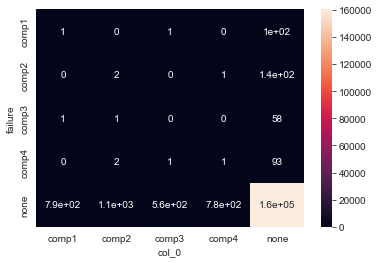

In [85]:
sns.heatmap(df_confusion, annot=True)
plt.show()

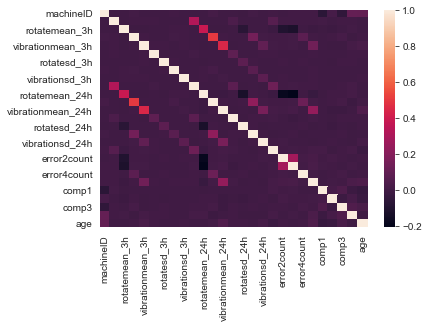

In [104]:
sns.heatmap(labeled_features.corr())
plt.show()

In [108]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'failure'],
      dtype='object')

In [179]:
#sns.pairplot(labeled_features)
pressureCorrelation = labeled_features[[
       'pressuremean_3h','pressuremean_24h','failure' ]]
pressureCorrelation

,pressuremean_3h,pressuremean_24h,failure
0,94.137969,96.797113,none
1,101.553209,96.849785,none
2,99.598722,97.715600,none
3,102.380586,96.666060,none
4,102.726648,95.766838,none
...,...,...,...
291336,103.183160,100.873360,none
291337,98.344409,101.789714,none
291338,108.055441,100.919285,none
291339,102.346227,101.568092,none


In [180]:
pressureCorrelation.loc[pressureCorrelation['failure'] == 'comp4']

,pressuremean_3h,pressuremean_24h,failure
24,99.413660,98.716746,comp4
1344,96.905050,101.515062,comp4
1944,103.631528,96.763961,comp4
2784,86.684047,100.700667,comp4
17656,109.447331,100.749561,comp4
...,...,...,...
285643,99.328349,100.379609,comp4
286123,99.712107,97.960634,comp4
286723,99.372702,98.957290,comp4
287923,95.402285,100.906828,comp4


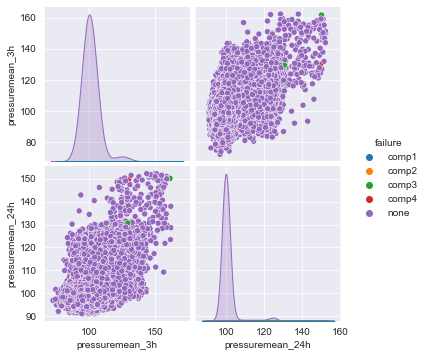

In [181]:
sns.pairplot(pressureCorrelation,hue="failure")

In [127]:
labeled_features.loc[labeled_features['failure'] == 'comp1'][:16]

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
504,1,2015-03-06 06:00:00,163.638876,467.391175,94.660949,38.667932,5.792593,53.901669,6.249948,7.661121,187.737117,440.479970,99.631991,39.430893,17.017563,47.244133,10.709832,5.916530,1.0,0.0,0.0,0.0,0.0,0.0,278.0,15.0,30.0,model3,18,comp1
3521,2,2015-03-19 06:00:00,177.978058,377.662333,109.773125,40.125778,23.649285,28.549657,9.646557,7.148055,190.838917,366.860951,97.803534,39.332376,14.670353,68.450859,10.779612,4.985227,1.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,15.0,model4,7,comp1
6107,3,2015-02-06 06:00:00,189.287367,424.257354,95.964069,43.657693,20.610648,16.568701,4.149214,3.300018,191.976113,451.739253,99.167542,41.436073,15.804559,49.440107,8.097960,4.245274,1.0,0.0,0.0,0.0,0.0,0.0,30.0,235.0,15.0,model3,8,comp1
9100,4,2015-02-16 06:00:00,183.055415,476.100304,93.360339,43.500995,11.645801,59.586989,5.177713,2.610983,192.066087,458.687029,101.551403,39.086376,13.119651,47.474308,11.830125,4.892235,1.0,0.0,0.0,0.0,0.0,0.0,30.0,95.0,65.0,model3,7,comp1
10660,4,2015-08-30 06:00:00,183.868719,445.213420,107.515568,38.448446,2.112413,23.493640,13.950824,6.361832,189.169772,441.434706,98.959983,40.490497,11.915902,38.014031,6.573360,4.436686,1.0,0.0,0.0,0.0,0.0,0.0,45.0,105.0,30.0,model3,7,comp1
12069,5,2015-02-23 06:00:00,193.980945,469.234745,102.873927,39.792684,7.339945,22.614492,1.103073,1.910924,187.598418,457.370890,98.941693,40.729514,13.652636,48.296079,10.578508,3.944843,1.0,0.0,0.0,0.0,0.0,0.0,30.0,15.0,0.0,model3,2,comp1
12429,5,2015-04-09 06:00:00,185.625060,407.719236,99.342660,40.824479,14.533629,55.280955,11.876045,2.994975,185.941117,442.357538,98.670659,39.563306,13.160041,48.258060,12.631144,4.172441,1.0,0.0,0.0,0.0,0.0,0.0,75.0,60.0,15.0,model3,2,comp1
13629,5,2015-09-06 06:00:00,191.934085,366.618852,99.893841,47.358063,26.317271,44.569211,9.947934,4.598652,190.204699,359.547485,100.271220,38.870274,12.583936,48.977392,9.677625,5.727468,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,120.0,model3,2,comp1
14229,5,2015-11-20 06:00:00,184.751673,427.326414,102.492712,43.637380,10.727383,9.035902,2.796057,8.581319,190.387507,433.967388,99.288058,41.560626,14.770028,49.203957,10.543609,4.700142,1.0,0.0,0.0,0.0,0.0,0.0,45.0,15.0,15.0,model3,2,comp1
17776,7,2015-02-08 06:00:00,179.909468,427.130858,105.190475,46.083329,3.159400,30.257383,7.853798,2.188404,191.166564,457.254605,102.014547,41.141188,9.944270,47.617160,9.805949,4.297888,1.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0,15.0,model3,20,comp1


In [93]:
print(labeled_features.corr())

                   machineID  voltmean_3h  rotatemean_3h  pressuremean_3h  \
machineID           1.000000    -0.001862       0.000550         0.007533   
voltmean_3h        -0.001862     1.000000      -0.002305         0.002655   
rotatemean_3h       0.000550    -0.002305       1.000000        -0.004451   
pressuremean_3h     0.007533     0.002655      -0.004451         1.000000   
vibrationmean_3h   -0.001657     0.001400      -0.007387         0.001448   
voltsd_3h          -0.000361     0.002472       0.000138        -0.001285   
rotatesd_3h        -0.001763    -0.001850      -0.000704        -0.000276   
pressuresd_3h       0.002736    -0.002022       0.003192         0.009860   
vibrationsd_3h     -0.000580     0.000891       0.001912         0.001610   
voltmean_24h       -0.003700     0.325386      -0.000573        -0.000217   
rotatemean_24h      0.000871    -0.001289       0.387634        -0.003087   
pressuremean_24h    0.011993    -0.000159      -0.004728         0.502763   

In [33]:
pd.get_dummies(labeled_features[['failure']])

,failure_comp1,failure_comp2,failure_comp3,failure_comp4,failure_none
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
291336,0,0,0,0,1
291337,0,0,0,0,1
291338,0,0,0,0,1
291339,0,0,0,0,1


In [34]:
model.coef_

array([[ 3.34513662e-02,  8.39823777e-04, -4.67681096e-03,
        -2.40303155e-02,  3.21528346e-03,  6.16858711e-04,
        -3.67973088e-02,  6.53301582e-03,  2.75860852e-01,
        -2.47041025e-02, -3.60162893e-02, -3.36954175e-01,
        -6.52056687e-02, -3.30978794e-02, -1.54649257e-03,
         1.01016714e-01,  8.42761845e+00, -1.87967418e+00,
         3.05301209e-01,  1.18689249e+00,  3.61392519e+00],
       [-1.62785299e-03, -3.38941154e-03,  1.54023401e-02,
         9.16490059e-03,  1.39122556e-02, -2.39440286e-03,
         1.44423628e-02, -5.18997470e-03,  2.50904557e-02,
        -3.73065803e-02, -9.13243099e-03,  2.91447967e-02,
        -3.14434114e-02, -9.04137857e-03, -3.99168561e-02,
        -7.53577018e-02, -4.50209098e-01,  5.58685312e+00,
         5.96357448e+00,  4.47027185e-02, -3.88675081e-01],
       [ 1.44087517e-02,  4.60653816e-03,  7.93185568e-02,
        -2.18633685e-02,  6.24236731e-04, -5.38829917e-03,
        -3.02911179e-02, -1.00066266e-01, -1.13342119e

In [35]:
model.coef_
pd.DataFrame(model.coef_,columns=X.columns,index=model.classes_)

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count
comp1,0.033451,0.000840,-0.004677,-0.024030,0.003215,0.000617,-0.036797,0.006533,0.275861,-0.024704,-0.036016,-0.336954,-0.065206,-0.033098,-0.001546,0.101017,8.427618,-1.879674,0.305301,1.186892,3.613925
comp2,-0.001628,-0.003389,0.015402,0.009165,0.013912,-0.002394,0.014442,-0.005190,0.025090,-0.037307,-0.009132,0.029145,-0.031443,-0.009041,-0.039917,-0.075358,-0.450209,5.586853,5.963574,0.044703,-0.388675
comp3,0.014409,0.004607,0.079319,-0.021863,0.000624,-0.005388,-0.030291,-0.100066,-0.113342,-0.022768,0.256631,-0.082046,0.032571,-0.023517,-0.194222,-0.292742,2.165552,0.285433,-1.074289,9.658638,0.531823
comp4,-0.003342,0.004252,0.004623,0.030509,0.014738,0.002172,0.020000,-0.035764,-0.052814,-0.009259,-0.047204,0.525436,-0.049520,0.005370,-0.053391,-0.100130,0.591858,-0.486084,0.288274,1.072974,10.050568
none,-0.004735,0.001923,-0.017447,-0.002126,-0.000309,0.002922,-0.016366,0.044221,-0.050953,0.024778,-0.037178,-0.062135,0.055261,0.027239,0.098136,0.170342,-2.834941,-1.535330,-1.634951,-2.787483,-3.915500


In [36]:
model.coef_.shape

(5, 21)

In [37]:
model.classes_

array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object)

In [38]:
sum(model.predict(X) == labeled_features['failure'])/len(labeled_features)

0.982824250620407

In [39]:
model.predict_proba(X).T.sum()/len(labeled_features)

1.0

In [78]:
from xgboost import XGBClassifier as xgb
modelx = xgb(n_jobs=-1)
modelx.fit(X=X, y=y.values.ravel())
modelx.score(X,y)

C:\Users\Michael\anaconda3\envs\predictive-maintenance\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.999859271437937

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X=X, y=y.values.ravel())

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X, y)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X, y)))

Learning rate:  0.05
Accuracy score (training): 0.997
Accuracy score (validation): 0.997
Learning rate:  0.075
Accuracy score (training): 0.997
Accuracy score (validation): 0.997
Learning rate:  0.1
Accuracy score (training): 0.997
Accuracy score (validation): 0.997
Learning rate:  0.25
Accuracy score (training): 0.991
Accuracy score (validation): 0.991
Learning rate:  0.5
Accuracy score (training): 0.997
Accuracy score (validation): 0.997
Learning rate:  0.75
Accuracy score (training): 0.001
Accuracy score (validation): 0.001
Learning rate:  1
Accuracy score (training): 0.001
Accuracy score (validation): 0.001


In [103]:
from sklearn.neural_network import MLPClassifier
modelx = MLPClassifier(solver='adam', alpha=0.8,
                     hidden_layer_sizes=(5, 2), random_state=1)
modelx.fit(X=X, y=y.values.ravel())
modelx.score(X,y)

0.997449723863102

## Evaluation

In predictive maintenance, machine failures are usually rare occurrences in the lifetime of the assets compared to normal operation. This causes an imbalance in the label distribution which usually causes poor performance as algorithms tend to classify majority class examples better at the expense of minority class examples as the total misclassification error is much improved when majority class is labeled correctly.  This causes low recall rates although accuracy can be high and becomes a larger problem when the cost of false alarms to the business is very high. To help with this problem, sampling techniques such as oversampling of the minority examples are usually used along with more sophisticated techniques.

## Summary

In this notebook,  the steps of implementing a predictive maintenance model is provided using an example scenario where the goal is to predict failures due to certain components of a machine. Typical steps of predictive maintenance such as feature engineering, labelling, training and evaluation are explained using the example data sets. 